In [ ]:
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
  
df = pd.read_csv('NLP_PROJECT.csv')
df.tail()

,English,Urdu
99995,'Jackass generation' pupils condemned over fir...,'جیکاس نسل' کے طلباء نے فائر اسٹنٹ پر مذمت کی
99996,One of the most extreme examples of religious ...,ہم جنس پرست لوگوں پر ظلم و ستم کی حمایت کرنے و...
99997,The miner also recorded half-yearly production...,کان کنی نے پیٹرولیم ، نکل اور زنک میں پیداوار ...
99998,And it happens every year.,اور یہ ہر سال ہوتا ہے۔
99999,"That is the current situation, however.",تاہم ، موجودہ صورتحال یہی ہے۔


In [ ]:
df.describe()

,English,Urdu
count,99999,100000
unique,90796,90759
top,#NAME?,مکمل طور پر ۔
freq,91,12


In [ ]:
df['English_sentence']=df['English']
df['Urdu_sentence']=df['Urdu']

In [ ]:
df.drop(columns=['Urdu'],inplace=True)
df.drop(columns=['English'],inplace=True)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test1, y_train, y_test1 = train_test_split(df['Urdu_sentence'], df['English_sentence'], test_size=0.3)

In [ ]:
y_train.describe()

count      69999
unique     65386
top       #NAME?
freq          60
Name: English_sentence, dtype: object

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_test1,  y_test1, test_size=0.5)

In [ ]:
x_val.describe()

count                     15000
unique                    14772
top       جب تک سانس تب تک آس ۔
freq                          3
Name: Urdu_sentence, dtype: object

In [ ]:
x_test.describe()

count        15000
unique       14765
top       کیونکہ ۔
freq             3
Name: Urdu_sentence, dtype: object

In [ ]:
def dataprepro(x,y):
    df1=pd.DataFrame(x)
    df2=pd.DataFrame(y)
    df3=pd.concat([df1, df2], axis=1)
    return df3

In [ ]:
training_data=dataprepro(x_train,y_train)
Val_data=dataprepro(x_val,y_val)
Testing_data=dataprepro(x_val,y_val)

In [ ]:
training_data.describe()

,Urdu_sentence,English_sentence
count,70000,69999
unique,65333,65386
top,دور کے ڈھول سہانے ۔,#NAME?
freq,9,60


In [ ]:
Val_data.describe()

,Urdu_sentence,English_sentence
count,15000,15000
unique,14772,14769
top,جب تک سانس تب تک آس ۔,#NAME?
freq,3,19


In [ ]:
Testing_data.describe()

,Urdu_sentence,English_sentence
count,15000,15000
unique,14772,14769
top,جب تک سانس تب تک آس ۔,#NAME?
freq,3,19


In [ ]:

def cleanerEng(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'[^a-z0-9]+',' ',x)
  if len(x) > 150:
    x = x[:150]
  return x

def cleanerurdu(x):
  x = str(x)
  x = re.sub(r'[-.।|,?;:<>&$₹]+',' ',x)
  if len(x) > 150:
    x = x[:150]
  return x
  

In [ ]:
training_data.iloc[:,0] = training_data['Urdu_sentence'].apply(func=cleanerurdu)
training_data.iloc[:,1] = training_data['English_sentence'].apply(func= cleanerEng)
training_data.iloc[:,0] = training_data['Urdu_sentence'].apply(func= lambda x : (str(x).split()))
training_data.iloc[:,1] = training_data['English_sentence'].apply(func= lambda x : (str(x).split()))

In [ ]:
training_data.head()

,Urdu_sentence,English_sentence
78365,"[ویاکون, کے, مسٹر, گلسپی, کہتے, ہیں, قدریں, بڑ...","[mr, gillespie, of, viacon, says, values, are,..."
12425,"[مسٹر, ولسن, کے, اہل, خانہ, کا, خیال, ہے, کہ, ...","[mr, wilson, s, family, believes, the, ira, wa..."
45074,"[میں, آپ, کو, یقین, دلاتا, ہوں, کہ, حالیہ, ادا...","[i, can, assure, you, that, despite, recent, g..."
26309,"[ترقیاتی, پالیسی, کو, اس, نئے, عالمی, دور, میں...","[development, policy, must, become, the, eu, s..."
74310,"[مجھے, برازیل, یا, دوسرے, ممالک, کو, شرمانے, م...","[i, am, not, interested, in, shaming, brazil, ..."


In [ ]:
def addTokens(x,start=False):
  x.append('<END>')
  if start:
    x.insert(0,'<START>')
  return list(x)

In [ ]:
training_data.iloc[:,0] = training_data['Urdu_sentence'].apply(func= addTokens,start=False)
training_data.iloc[:,1] = training_data['English_sentence'].apply(func= addTokens,start=True)

In [ ]:
training_data.iloc[:,0]

78365    [ویاکون, کے, مسٹر, گلسپی, کہتے, ہیں, قدریں, بڑ...
12425    [مسٹر, ولسن, کے, اہل, خانہ, کا, خیال, ہے, کہ, ...
45074    [میں, آپ, کو, یقین, دلاتا, ہوں, کہ, حالیہ, ادا...
26309    [ترقیاتی, پالیسی, کو, اس, نئے, عالمی, دور, میں...
74310    [مجھے, برازیل, یا, دوسرے, ممالک, کو, شرمانے, م...
                               ...                        
48127    [ملونی, کو, اس, کی, رخصت, کے, دوران, ،, فن, تع...
38421    [دوسری, بڑی, کرنسیوں, کے, مقابلہ, میں, ڈالر, ق...
66441    [صدر, جمعہ, ،, 26, مارچ, بروز, جمعہ, دیر, سے, ...
56767                   [سچ, پکے, سو, میٹھا, ہو, ۔, <END>]
70651    [اس, موضوع, کو, دو, طرفہ, سے, نمٹا, جا, رہا, ہ...
Name: Urdu_sentence, Length: 70000, dtype: object

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import random

In [ ]:
data = training_data.values

In [ ]:
data[:,1].shape

(70000,)

In [ ]:
class vocab:

  def __init__(self,data,token=True):
    self.data = data
    if token:
      self.word2idx = {'<START>':1, '<END>':2, '<PAD>':0}
      self.idx2word = {1:'<START>', 2:'<END>', 0:'<PAD>'}
      self.idx = 2

    else:
      self.word2idx = {'<PAD>':0, '<END>':1}
      self.idx2word = {0:'<PAD>', 1:'<END>'}
      self.idx = 1

    self.x = []
    self.create()
    self.vocab_size = self.idx + 1

  def create(self):
    max_len = 0;
    for sentence in  self.data:
      max_len = max(max_len, len(sentence))
      for word in sentence:
        if self.word2idx.get(word) is None:
          self.idx += 1
          self.word2idx[word] = self.idx
          self.idx2word[self.idx] = word
    
    for sentence in self.data:
      sent = []
      for word in sentence:
        sent.append(self.word2idx[word])
      
      for i in range(len(sentence),max_len+1):
        sent.append(0)
      
      self.x.append(torch.Tensor(sent))

    

In [ ]:
data[:,0]

array([list(['ویاکون', 'کے', 'مسٹر', 'گلسپی', 'کہتے', 'ہیں', 'قدریں', 'بڑھ', 'رہی', 'ہیں', '۔', '<END>']),
       list(['مسٹر', 'ولسن', 'کے', 'اہل', 'خانہ', 'کا', 'خیال', 'ہے', 'کہ', 'یہ', 'قتل', 'اس', 'کی', 'ذمہ', 'دار', 'تھا', 'اگرچہ', 'تنظیم', 'کی', 'قیادت', 'نے', 'کبھی', 'بھی', 'سرکاری', 'طور', 'پر', 'اس', 'قتل', 'کو', 'قبول', 'نہیں', 'کیا۔', '<END>']),
       list(['میں', 'آپ', 'کو', 'یقین', 'دلاتا', 'ہوں', 'کہ', 'حالیہ', 'اداس', 'تشخیص', 'کے', 'باوجود', '،', 'چوکور', 'ابھی', 'بھی', 'سرگرم', 'ہے۔', '<END>']),
       ...,
       list(['صدر', 'جمعہ', '،', '26', 'مارچ', 'بروز', 'جمعہ', 'دیر', 'سے', 'واشنگٹن', 'واپس', 'آنے', 'والے', 'ہیں۔', '<END>']),
       list(['سچ', 'پکے', 'سو', 'میٹھا', 'ہو', '۔', '<END>']),
       list(['اس', 'موضوع', 'کو', 'دو', 'طرفہ', 'سے', 'نمٹا', 'جا', 'رہا', 'ہے', 'اور', 'میں', 'ایک', 'بار', 'پھر', 'کہہ', 'سکتا', 'ہوں', 'کہ', 'آج', 'تک', 'کی', 'پیشرفت', 'قابل', 'اطمینان', 'بخش', 'رہی', 'ہے۔', '<END>'])],
      dtype=object)

In [ ]:
Urdu_vocab = vocab(data[:,0],token=False)
English_vocab = vocab(data[:,1],token=True)

In [ ]:
Urdu_vocab

In [ ]:
for idx in Urdu_vocab.x[3]:  ###
  print(Urdu_vocab.idx2word[int(idx)],end=' ')

ترقیاتی پالیسی کو اس نئے عالمی دور میں ای یو کا مشن بننا چاہئے۔ <END> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [ ]:
class parallelData(Dataset):

  def __init__(self):
    self.x = Urdu_vocab.x
    self.y = English_vocab.x

  def __getitem__(self,i):
    return self.x[i], self.y[i]
  
  def __len__(self):
    return len(self.x)


In [ ]:
dataset = parallelData()

In [ ]:
dataset[0][0]

tensor([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  7., 11.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.])

In [ ]:
a = dataset[0][0].shape[0]
b = dataset[0][1].shape[0]
for i in range(len(dataset)):
  if a != dataset[i][0].shape[0] or b != dataset[i][1].shape[0]:
    print(a,dataset[i][0].shape[0],b,dataset[i][1].shape[0])

In [ ]:
Urdu_vocab.x[40].shape

torch.Size([43])

In [ ]:
torch.cuda.device_count()

1

Model Prepration

In [ ]:


class encoder(nn.Module):

  def __init__(self, input_size, embedding_size, hidden_size, layers, bidirectional):
    '''
    input_size = size of vocab
    embedding_size = embedding dim
    hidden_size = hidden state size
    layer = num of layers of lstms
    '''
    super().__init__()
    self.embed = nn.Embedding(num_embeddings=input_size, embedding_dim=embedding_size) # output size = (*,embedding_size)
    self.lstm = nn.LSTM(input_size=embedding_size, hidden_size= hidden_size, num_layers=layers, batch_first = True, bidirectional = bidirectional)
    self.bidirectional = bidirectional
    #in order to convert bidirectional hidden state to unidirectional if LSTM is bidirectional 
    self.fc_hidden = nn.Linear(hidden_size*2, hidden_size)
    self.fc_cell = nn.Linear(hidden_size*2, hidden_size)

  def forward(self,x):
    '''
    x shape = [batch_size, sentence]
    one complete sentence represents a "sequence"
    '''
    x = self.embed(x) # shape [batch_size,  sentence, embed_size]
    output, (hidden_state, cell_state) = self.lstm(x) #shape [batch_size, seq_len, num_directions(2)*hidden_size]

    if self.bidirectional:  #since we have 2 directions so add(concat) hidden of both directions into one
      hidden = torch.cat((hidden_state[0:1], hidden_state[1:2]), dim=2)
      cell = torch.cat((cell_state[0:1], cell_state[1:2]), dim = 2) #output [1(layer), batch, hidden_size*2]
      hidden_state = self.fc_hidden(hidden)
      cell_state = self.fc_cell(cell)

   
    return output, hidden_state, cell_state

##_---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
class decoder(nn.Module):

  def __init__(self,input_size, embedding_size, hidden_size, layers):
    
    super().__init__()
    self.embed = nn.Embedding(num_embeddings=input_size, embedding_dim=embedding_size) # output size = (*,embedding_size)
    self.lstm = nn.LSTM(input_size=embedding_size, hidden_size= hidden_size, num_layers=layers, batch_first = True)
    self.fc = nn.Linear(in_features=hidden_size, out_features=input_size) #since output would be prob distribution among hindi vocab therefore out_feature=input_size

  def forward(self,x,hidden_state, cell_state):
    '''
    to have control over output we have to take sentence as word by word
    therefore seq_len would be 1 as input is  one word not the whole sentence
    x = [batch_size] ->required-> [batch_size, 1] (1 is seq_len)
    '''
    # print(x.shape)
    x = x.reshape(-1,1) # shape [batch, 1]
    # print(x.shape)
    x = self.embed(x) # shape [batch, 1, embed_dim]

    output, (hidden_state, cell_state) = self.lstm(x, (hidden_state, cell_state)) # shape output=>[batch, 1, hidden_size], hidden=>[layers, batch, hidden_size]
    output = self.fc(output) # shape [batch, 1, English_vocab_size]
    
    #just for removing extra dim
    output = output.squeeze(dim=1) #shape [batch, English_vocab_size]

    return output, hidden_state, cell_state


##_---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

class AttnDecoder(nn.Module):
  def __init__(self, input_size, embedding_size, hidden_size, layers):
    super().__init__()

    self.embed = nn.Embedding(num_embeddings=input_size, embedding_dim=embedding_size) # output size = (*,embedding_size)
    self.lstm = nn.LSTM(input_size=hidden_size*2 + embedding_size, hidden_size= hidden_size, num_layers=layers, batch_first = True)
    self.fc = nn.Linear(in_features=hidden_size, out_features=input_size) #since output would be prob distribution among hindi vocab therefore out_feature=input_size

    #encoder_states from encoder => [batch, seq_len(35), 2*hidden_size]
    #prev decoder hidden_state => [batch, layers(1)*directions(2), hidden_size] =>need to be in => [batch, seq(35), hidden_size]
    #therefore input of energy will be along hidden_size ie input = hidden_size*2
    self.energy =  nn.Linear(hidden_size*3, 1) #out [batch, seq_len, 1] (2 hidden state from bidirectional encoder and 1 from prev decoder hidden state => 1+2= 3 hidden states as input)
    self.softmax = nn.Softmax(dim=1)# doing softmax for each word ie (dim=1)

  
  def forward(self, x, hidden_state, cell_state, encoder_states):
    # print(encoder_states.shape)
    seq_len = encoder_states.shape[1]
    batch_size = encoder_states.shape[0]
    hidden_size = encoder_states.shape[2]

    h_new = hidden_state.repeat(seq_len, 1, 1) #shape [seq_len*1, batch, hidden_size*2(bidirectional)] it will repeat dim=0 seq length times
    #by doing .repeat operation we can concat hidden state with all timestamps of encoder_states
    # print(h_new.shape, encoder_states.shape, hidden_state.shape)
    h_new = h_new.permute(1,0,2) #[batch, seq_len, hidden_size*2]
    energy = self.energy(torch.cat((h_new, encoder_states), dim=2))#input [batch, seq_len(35), hidden_size*3]  out = [batch, seq_len(35), 1]
    att_weights = self.softmax(energy)
    att_weights = att_weights.permute(0,2,1) # [batch, 1, seq_len]

    context = torch.bmm(att_weights, encoder_states) #[batch, 1, hidden_size*2]
    

    x = x.reshape(-1,1) # shape [batch, 1]
    x = self.embed(x) # shape [batch, 1, embed_dim]

    input_new = torch.cat((context, x), dim=2) #[batch, 1, hidden_size*2 +embed_dim]

    output, (hidden_state, cell_state) = self.lstm(input_new, (hidden_state, cell_state)) # shape output=>[batch, 1, hidden_size], hidden=>[layers, batch, hidden_size]
    output = self.fc(output) # shape [batch, 1, English_vocab_size]

    output = output.squeeze(dim=1) #shape [batch, English_vocab_size]
    del h_new
    del context
    del input_new
    return output, hidden_state, cell_state

##_---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

class seq2seq(nn.Module):
  def __init__(self, encoder, decoder):
    super().__init__()
    self.encoder = encoder
    self.decoder = decoder


  def forward(self, input, target, teaching_force=0.5):
    '''
    input = batch of english sentences[batch, sentece(padded)]
    target = batch of hindi sentences [batch, sentence(padded)] 
    '''
    batch_size = input.shape[0]
    seq_len = target.shape[1]
    English_vocab_size = English_vocab.vocab_size

    output = torch.zeros((seq_len, batch_size, English_vocab_size)).to(device)

    _, hidden, cell = self.encoder(input)
    target = target.permute(1,0) # shape [seq, batch]
    x = target[0] # <START> token

    for i in range(1, seq_len):
      out, hidden, cell = self.decoder(x, hidden, cell) #out shape = [batch, vocab_size]
      output[i] = out
      decoder_guess = out.argmax(1)# taking the word with max value(confidence)  shape = [batch of words]

      if random.random() < teaching_force:
        x = target[i]
      else:
        x =  decoder_guess
    
    return output  #shape[seq_len, batch_size, vocab_size]

##_---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

class Attnseq2seq(nn.Module):
  def __init__(self, encoder, att_decoder):
    super().__init__()
    self.encoder = encoder
    self.decoder = att_decoder


  def forward(self, input, target, teaching_force=0.5):
    '''
    input = batch of english sentences[batch, sentece(padded)]
    target = batch of hindi sentences [batch, sentence(padded)] 
    '''
    batch_size = input.shape[0]
    seq_len = target.shape[1]
    English_vocab_size = English_vocab.vocab_size

    output = torch.zeros((seq_len, batch_size, English_vocab_size)).to(device)

    encoder_states, hidden, cell = self.encoder(input)
    target = target.permute(1,0) # shape [seq, batch]
    x = target[0] # <START> token

    for i in range(1, seq_len):
      out, hidden, cell = self.decoder(x, hidden, cell, encoder_states) #out shape = [batch, vocab_size]
      output[i] = out
      decoder_guess = out.argmax(1)# taking the word with max value(confidence)  shape = [batch of words]

      if random.random() < teaching_force:
        x = target[i]
      else:
        x =  decoder_guess
    
    return output  #shape[seq_len, batch_size, vocab_size]



In [ ]:
##training

epochs = 65
learning_rate = 0.0006
batch_size = 100

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embedding_size = 256
hidden_size = 256
layers = 1
bidirection = True


In [ ]:
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
it = iter(loader)
x,y = next(it)
print(x.shape,y.shape)
len(dataset)


torch.Size([100, 43]) torch.Size([100, 37])


70000

In [ ]:
ENC = encoder(Urdu_vocab.vocab_size, embedding_size, hidden_size, layers, bidirection).to(device)
# DE = decoder(English_vocab.vocab_size, embedding_size, hidden_size, layers).to(device)
DE = AttnDecoder(English_vocab.vocab_size, embedding_size, hidden_size, layers).to(device)
# model = seq2seq(ENC,DE).to(device)
model = Attnseq2seq(ENC,DE).to(device)
optimizer = optim.Adam(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)


In [ ]:
train_loss = []
for epoch in tqdm(range(epochs)):
  for id,(x,y) in (enumerate(tqdm(loader))):
    x = x.long().to(device)
    y = y.long().to(device)#[batch,seq]

    output = model(x,y,1)# [seq, batch, vocab]
    output = output[1:].reshape(-1,output.shape[2])
    y = y.permute(1,0)#[seq, batch]
    y = y[1:].reshape(-1)

    optimizer.zero_grad()
    loss = criterion(output,y)

    loss.backward()
    optimizer.step()

    # if id%20 == 0:
  print(f'[{epoch+1}/{epochs}] loss=>{loss.item()}')
  train_loss.append(loss.item())

  

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/700 [00:00<?, ?it/s]

[1/65] loss=>6.316110610961914


  0%|          | 0/700 [00:00<?, ?it/s]

[2/65] loss=>5.771323204040527


  0%|          | 0/700 [00:00<?, ?it/s]

[3/65] loss=>5.288843154907227


  0%|          | 0/700 [00:00<?, ?it/s]

[4/65] loss=>4.976947784423828


  0%|          | 0/700 [00:00<?, ?it/s]

[5/65] loss=>4.823824405670166


  0%|          | 0/700 [00:00<?, ?it/s]

[6/65] loss=>4.817137241363525


  0%|          | 0/700 [00:00<?, ?it/s]

[7/65] loss=>4.322161674499512


  0%|          | 0/700 [00:00<?, ?it/s]

[8/65] loss=>4.218318939208984


  0%|          | 0/700 [00:00<?, ?it/s]

[9/65] loss=>3.882889986038208


  0%|          | 0/700 [00:00<?, ?it/s]

[10/65] loss=>3.8976032733917236


  0%|          | 0/700 [00:00<?, ?it/s]

[11/65] loss=>3.7173168659210205


  0%|          | 0/700 [00:00<?, ?it/s]

[12/65] loss=>3.417841672897339


  0%|          | 0/700 [00:00<?, ?it/s]

[13/65] loss=>3.332477569580078


  0%|          | 0/700 [00:00<?, ?it/s]

[14/65] loss=>3.2229726314544678


  0%|          | 0/700 [00:00<?, ?it/s]

[15/65] loss=>3.1084177494049072


  0%|          | 0/700 [00:00<?, ?it/s]

[16/65] loss=>2.7776119709014893


  0%|          | 0/700 [00:00<?, ?it/s]

[17/65] loss=>2.7936642169952393


  0%|          | 0/700 [00:00<?, ?it/s]

[18/65] loss=>2.6424124240875244


  0%|          | 0/700 [00:00<?, ?it/s]

[19/65] loss=>2.572110176086426


  0%|          | 0/700 [00:00<?, ?it/s]

[20/65] loss=>2.384094476699829


  0%|          | 0/700 [00:00<?, ?it/s]

[21/65] loss=>2.309939384460449


  0%|          | 0/700 [00:00<?, ?it/s]

[22/65] loss=>2.2787084579467773


  0%|          | 0/700 [00:00<?, ?it/s]

[23/65] loss=>2.044827699661255


  0%|          | 0/700 [00:00<?, ?it/s]

[24/65] loss=>2.0760350227355957


  0%|          | 0/700 [00:00<?, ?it/s]

[25/65] loss=>1.9755436182022095


  0%|          | 0/700 [00:00<?, ?it/s]

[26/65] loss=>2.0407705307006836


  0%|          | 0/700 [00:00<?, ?it/s]

[27/65] loss=>1.7199268341064453


  0%|          | 0/700 [00:00<?, ?it/s]

[28/65] loss=>1.8075312376022339


  0%|          | 0/700 [00:00<?, ?it/s]

[29/65] loss=>1.7375541925430298


  0%|          | 0/700 [00:00<?, ?it/s]

[30/65] loss=>1.64193594455719


  0%|          | 0/700 [00:00<?, ?it/s]

[31/65] loss=>1.5940296649932861


  0%|          | 0/700 [00:00<?, ?it/s]

[32/65] loss=>1.6319211721420288


  0%|          | 0/700 [00:00<?, ?it/s]

[33/65] loss=>1.511613130569458


  0%|          | 0/700 [00:00<?, ?it/s]

[34/65] loss=>1.413604736328125


  0%|          | 0/700 [00:00<?, ?it/s]

[35/65] loss=>1.3488245010375977


  0%|          | 0/700 [00:00<?, ?it/s]

[36/65] loss=>1.3251421451568604


  0%|          | 0/700 [00:00<?, ?it/s]

[37/65] loss=>1.2794926166534424


  0%|          | 0/700 [00:00<?, ?it/s]

[38/65] loss=>1.3628170490264893


  0%|          | 0/700 [00:00<?, ?it/s]

[39/65] loss=>1.115706443786621


  0%|          | 0/700 [00:00<?, ?it/s]

[40/65] loss=>1.0380738973617554


  0%|          | 0/700 [00:00<?, ?it/s]

[41/65] loss=>1.0830494165420532


  0%|          | 0/700 [00:00<?, ?it/s]

[42/65] loss=>1.0710171461105347


  0%|          | 0/700 [00:00<?, ?it/s]

[43/65] loss=>1.0610288381576538


  0%|          | 0/700 [00:00<?, ?it/s]

[44/65] loss=>1.0025335550308228


  0%|          | 0/700 [00:00<?, ?it/s]

[45/65] loss=>0.8913220763206482


  0%|          | 0/700 [00:00<?, ?it/s]

[46/65] loss=>0.9268637299537659


  0%|          | 0/700 [00:00<?, ?it/s]

[47/65] loss=>0.7906787991523743


  0%|          | 0/700 [00:00<?, ?it/s]

[48/65] loss=>0.8489865660667419


  0%|          | 0/700 [00:00<?, ?it/s]

[49/65] loss=>0.7428959012031555


  0%|          | 0/700 [00:00<?, ?it/s]

[50/65] loss=>0.7188665270805359


  0%|          | 0/700 [00:00<?, ?it/s]

[51/65] loss=>0.6969950795173645


  0%|          | 0/700 [00:00<?, ?it/s]

[52/65] loss=>0.7092901468276978


  0%|          | 0/700 [00:00<?, ?it/s]

[53/65] loss=>0.7345495223999023


  0%|          | 0/700 [00:00<?, ?it/s]

[54/65] loss=>0.604603111743927


  0%|          | 0/700 [00:00<?, ?it/s]

[55/65] loss=>0.5787965655326843


  0%|          | 0/700 [00:00<?, ?it/s]

[56/65] loss=>0.5665590167045593


  0%|          | 0/700 [00:00<?, ?it/s]

[57/65] loss=>0.5313566327095032


  0%|          | 0/700 [00:00<?, ?it/s]

[58/65] loss=>0.5439572930335999


  0%|          | 0/700 [00:00<?, ?it/s]

[59/65] loss=>0.5344091057777405


  0%|          | 0/700 [00:00<?, ?it/s]

[60/65] loss=>0.5089995861053467


  0%|          | 0/700 [00:00<?, ?it/s]

[61/65] loss=>0.43228068947792053


  0%|          | 0/700 [00:00<?, ?it/s]

[62/65] loss=>0.4555899500846863


  0%|          | 0/700 [00:00<?, ?it/s]

[63/65] loss=>0.43505898118019104


  0%|          | 0/700 [00:00<?, ?it/s]

[64/65] loss=>0.40310153365135193


  0%|          | 0/700 [00:00<?, ?it/s]

[65/65] loss=>0.4143325388431549


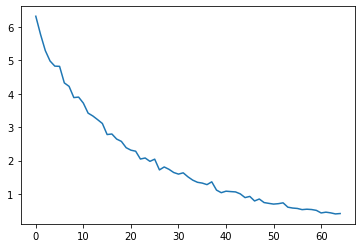

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.show()

In [ ]:
torch.save(model.state_dict(),'model.pt')
from google.colab import files
files.download('model.pt')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
def prediction(x):
    for idx in x:
      if idx == 0:
        break
      print(Urdu_vocab.idx2word[int(idx)],end=' ')
    
    print()

    x = x.long().reshape(1,-1).to(device)
    ans = translate(x)
    res = []
    for id in ans:
      res.append(English_vocab.idx2word[id])
    
    return res


In [ ]:
def translate(input):
      #input = batch of english sentences[batch, sentece(padded)]
      with torch.no_grad():
        guess = []
        encoder_states, hidden, cell = model.encoder(input)
        # x = torch.ones((1)).float().to(device) # <START> token
        x = torch.ones((1)).long().to(device)
        while True:
          out, hidden, cell = model.decoder(x, hidden, cell, encoder_states) #out shape = [batch, vocab_size]
          x = out.argmax(1)# taking the word with max value(confidence)  shape = [batch of words]
          guess.append(int(x[0].detach().cpu()))

          if x == 2:
            break

      return guess

In [ ]:
prediction(dataset[40][0])

کبھی کبھی آپ کو صرف اس وقت احساس ہوتا ہے جب بہت دیر ہو جاتی ہے ، لیکن اس بار یہ وقت کے ساتھ ہی ہوا۔ <END> 


['sometimes',
 'you',
 'only',
 'realise',
 'when',
 'it',
 'is',
 'very',
 'sensitive',
 'time',
 'because',
 'it',
 'once',
 'it',
 'just',
 'about',
 'time',
 '<END>']

In [ ]:
def get(sent):
  # sentence = sentence.lower()
  # sent = sentence.split()
  # sent.append('<END>')
  # print(sent)

  toks = []
  for word in sent:
    if Urdu_vocab.word2idx.get(word) is None:
      toks.append(Urdu_vocab.word2idx['the'])
    else:
      toks.append(Urdu_vocab.word2idx[word])
  # print(toks)
  sent = torch.tensor(toks).float()
  res = prediction(sent)
  # print(res)
  return res

In [ ]:
Testing_data.head()

,Urdu_sentence,English_sentence
96063,مطالعہ سیاسیات,The study of politics
30321,میں اسے تھوڑا سا دو ٹوک الفاظ میں بتا رہا ہوں:...,I am putting this a little bluntly: they are n...
57362,اللہ کے نام میں بڑی طاقت ہے ۔,The name of the lord is a very strong tower.
11809,یوروپی یونین کے رکن ممالک اسپین ، نیلر لینڈز ا...,"European Union member states Spain, the Nether..."
33840,"لڑیاں از : کاشفی , اپریل 29 , 2010 , 6 جوابات ...","Threads by: Kashifi, April 29, 2010, 6 Replies..."


In [ ]:
Testing_data.iloc[:,0] = Testing_data['Urdu_sentence'].apply(func=cleanerurdu)
Testing_data.iloc[:,1] = Testing_data['English_sentence'].apply(func= cleanerEng)
Testing_data.iloc[:,0] = Testing_data['Urdu_sentence'].apply(func= lambda x : (str(x).split()))
Testing_data.iloc[:,1] = Testing_data['English_sentence'].apply(func= lambda x : (str(x).split()))

In [ ]:
Testing_data.iloc[:,0] = Testing_data['Urdu_sentence'].apply(func= addTokens,start=False)
Testing_data.iloc[:,1] = Testing_data['English_sentence'].apply(func= addTokens,start=True)

In [ ]:
Testing_data.head()

,Urdu_sentence,English_sentence
96063,"[مطالعہ, سیاسیات, <END>]","[<START>, the, study, of, politics, <END>]"
30321,"[میں, اسے, تھوڑا, سا, دو, ٹوک, الفاظ, میں, بتا...","[<START>, i, am, putting, this, a, little, blu..."
57362,"[اللہ, کے, نام, میں, بڑی, طاقت, ہے, ۔, <END>]","[<START>, the, name, of, the, lord, is, a, ver..."
11809,"[یوروپی, یونین, کے, رکن, ممالک, اسپین, ،, نیلر...","[<START>, european, union, member, states, spa..."
33840,"[لڑیاں, از, کاشفی, اپریل, 29, 2010, 6, جوابات,...","[<START>, threads, by, kashifi, april, 29, 201..."


In [ ]:
tdata =Testing_data.values
test_dataset = vocab(tdata[:,0],token=False)

In [ ]:
tdata[:,0]

array([list(['مطالعہ', 'سیاسیات', '<END>']),
       list(['میں', 'اسے', 'تھوڑا', 'سا', 'دو', 'ٹوک', 'الفاظ', 'میں', 'بتا', 'رہا', 'ہوں', 'وہ', 'صرف', 'سیکیورٹی', 'کی', 'بنیاد', 'پر', 'ہمارے', 'ساتھ', 'تعاون', 'کرنے', 'کو', 'تیار', 'نہیں', 'ہیں۔', '<END>']),
       list(['اللہ', 'کے', 'نام', 'میں', 'بڑی', 'طاقت', 'ہے', '۔', '<END>']),
       ...,
       list(['امریکی', 'حکومت', 'کے', 'وکلاء', 'نے', 'جنگ', 'کی', 'قانونی', 'حیثیت', 'پر', 'میرا', 'خیال', 'بدل', 'دیا', '،', 'سنار', '<END>']),
       list(['ایک', 'غص', 'ہ', 'غص', 'ہ', 'ہے۔', '<END>']),
       list(['کاہلی', 'سب', 'کاموں', 'کو', 'مشکل', 'بنا', 'دیتی', 'ہے', 'اور', 'مشقت', 'آسان', '۔', '<END>'])],
      dtype=object)

In [ ]:
tdata[342,0]

['میڈم',
 'کے',
 'صدر',
 '،',
 'کمشنر',
 '،',
 'آپ',
 'کی',
 'دی',
 'گئی',
 'معلومات',
 'کا',
 'میں',
 'بہت',
 'شکر',
 'گزار',
 'ہوں۔',
 '<END>']

In [ ]:
res = get(tdata[342,0])[:-1]
print(res)
print(tdata[342,0][:-1])

میڈم کے صدر ، کمشنر ، آپ کی دی گئی معلومات کا میں بہت شکر گزار ہوں۔ <END> 
['madam', 'rapporteur', 'mrs', 'malmstr', 'm', 'you', 'mentioned', 'the', 'matter', 'address', 'today']
['میڈم', 'کے', 'صدر', '،', 'کمشنر', '،', 'آپ', 'کی', 'دی', 'گئی', 'معلومات', 'کا', 'میں', 'بہت', 'شکر', 'گزار', 'ہوں۔']


In [ ]:
tr_data =training_data.values

In [ ]:
#For training
list_refrences_train = []
list_hypothesis_train = []
for i in tqdm(range(7000)):
  list_refrences_train.append(tr_data[i,0][:-1])
  list_hypothesis_train.append((get(tr_data[i,0])[:-1]))

  0%|          | 0/7000 [00:00<?, ?it/s]

ویاکون کے مسٹر گلسپی کہتے ہیں قدریں بڑھ رہی ہیں ۔ <END> 
مسٹر ولسن کے اہل خانہ کا خیال ہے کہ یہ قتل اس کی ذمہ دار تھا اگرچہ تنظیم کی قیادت نے کبھی بھی سرکاری طور پر اس قتل کو قبول نہیں کیا۔ <END> 
میں آپ کو یقین دلاتا ہوں کہ حالیہ اداس تشخیص کے باوجود ، چوکور ابھی بھی سرگرم ہے۔ <END> 
ترقیاتی پالیسی کو اس نئے عالمی دور میں ای یو کا مشن بننا چاہئے۔ <END> 
مجھے برازیل یا دوسرے ممالک کو شرمانے میں دلچسپی نہیں ہے۔ <END> 
پیراگراف 11 میں مجھے یہ دیکھ کر خوشی ہوئی کہ آپ کہتے ہیں کہ عزم و اتفاق سے کوئی پرواز نہیں ہونی چاہئے۔ <END> 
اس حکمت عملی نے بہتر ملازمتوں اور بہتر ملازمتوں کی بات کی ہے بلا شبہ محفوظ ملازمتوں کا مطلب ہے۔ <END> 
یہ گلیشیئر اب پگھل رہا ہے اور یہ ایک گھنٹے میں دو میٹر دو میٹر ایک گھنٹہ کی رفتار سے آگے بڑھ رہا ہے! <END> 
آج ، بہت سارے طلباء اور ان کے بڑھتے ہوئے زیادہ والدین صدر کے ساتھ ذاتی بانڈ چاہتے ہیں۔ <END> 
معیاری انگریزی ۔ <END> 
اتفاقاً ملنا ۔ <END> 
معذرت کی اور چلتے بنے ۔ <END> 
جسمانی ساجوس اور دیگر کمپنی مترجموں نے بھیڑ میں فلٹر کیا تاکہ یہ سمجھا سکے کہ امداد کہا

In [ ]:
import nltk
from nltk.util import ngrams
print(f"bleu-1 : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train, weights=(1.0,0.0,0.0,0.0))}")
print(f"bleu-2 : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train, weights=(0.5,0.5,0.0))}")
print(f"bleu-3 : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train, weights=(0.33,0.33,0.33,0.0))}")
print(f"bleu-4 : {nltk.translate.bleu_score.corpus_bleu(list_refrences_train, list_hypothesis_train, weights=(0.25,0.25,0.25,0.25))}")

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


bleu-1 : 0.003010059641702195
bleu-2 : 0.0004274604400112438
bleu-3 : 1.7824402277222797e-104
bleu-4 : 3.084041262069965e-156


In [ ]:
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu
bleu = sentence_bleu

In [ ]:
list_refrences_train

NameError: name 'list_refrences_train' is not defined

In [ ]:
#For testing
list_refrences = []
list_hypothesis = []
for i in tqdm(range(int(tdata.shape[0]/2))):
  list_refrences.append(tdata[i,0][:-1])
  list_hypothesis.append((get(tdata[i,0])[:-1]))

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
list_refrences[:10]

In [ ]:
list_hypothesis[:10]

In [ ]:
##
#print('BLEU score -> {}'.format(sentence_bleu(list_refrences, list_hypothesis)))

In [ ]:
##
#print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
#print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
#print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
#print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))


In [ ]:
import nltk
from nltk.util import ngrams
print(f"bleu-1 : {nltk.translate.bleu_score.corpus_bleu(list_refrences, list_hypothesis, weights=(1.0,0.0,0.0,0.0))}")
print(f"bleu-2 : {nltk.translate.bleu_score.corpus_bleu(list_refrences, list_hypothesis, weights=(0.5,0.5,0.0))}")
print(f"bleu-3 : {nltk.translate.bleu_score.corpus_bleu(list_refrences, list_hypothesis, weights=(0.33,0.33,0.33,0.0))}")
print(f"bleu-4 : {nltk.translate.bleu_score.corpus_bleu(list_refrences, list_hypothesis, weights=(0.25,0.25,0.25,0.25))}")

In [ ]:
print(f"bleu : {nltk.translate.bleu_score.corpus_bleu(list_refrences, list_hypothesis)}")